In [1]:
# Import the needed libraries and read the csv files

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from scipy.stats import pearsonr

city_df = pd.read_csv("city_temp.csv")

global_df = pd.read_csv("global_temp.csv")

city_global_df = pd.read_csv("city_global_temp.csv")

In [2]:
# Display the top observations from each file

print("Top 5 observations in cities_temp file")

print("=============================================")

print(f"{city_df.head(5)}\n\n")

print("Top 5 observations in global_temp file")

print("=============================================")

print(f"{global_df.head(5)}\n\n")

print("Top 5 observations in city_global_temp file")

print("=============================================")

print(city_global_df.head(5))

Top 5 observations in cities_temp file
   year     city        country  avg_temp
0  1849  Abidjan  Côte D'Ivoire     25.58
1  1850  Abidjan  Côte D'Ivoire     25.52
2  1851  Abidjan  Côte D'Ivoire     25.67
3  1852  Abidjan  Côte D'Ivoire       NaN
4  1853  Abidjan  Côte D'Ivoire       NaN


Top 5 observations in global_temp file
   year  avg_temp
0  1750      8.72
1  1751      7.98
2  1752      5.78
3  1753      8.39
4  1754      8.47


Top 5 observations in city_global_temp file
   year     city        country  city_avg_temp  global_avg_temp
0  1849  Abidjan  Côte D'Ivoire          25.58             7.98
1  1850  Abidjan  Côte D'Ivoire          25.52             7.90
2  1851  Abidjan  Côte D'Ivoire          25.67             8.18
3  1852  Abidjan  Côte D'Ivoire            NaN             8.10
4  1853  Abidjan  Côte D'Ivoire            NaN             8.04


In [3]:
# Display the number of observations in each file

print(f"Number of rows and columns in city_temp file are {city_df.shape}\n")

print(f"Number of observations in city_temp file are: {city_df.shape[0]}\n")

print(f"Number of rows and columns in global_temp file are {global_df.shape}\n")

print(f"Number of observations in global_temp file are: {global_df.shape[0]}\n")

print(f"Number of rows and columns in global_temperatures file are {city_global_df.shape}\n")

print(f"Number of observations in global_temperatures file are: {city_global_df.shape[0]}\n")

Number of rows and columns in city_temp file are (70792, 4)

Number of observations in city_temp file are: 70792

Number of rows and columns in global_temp file are (266, 2)

Number of observations in global_temp file are: 266

Number of rows and columns in global_temperatures file are (70239, 5)

Number of observations in global_temperatures file are: 70239



In [4]:
# Ask to input the country name

your_country = str(input("Enter your country name: "))

Enter your country name: India


In [5]:
# Separate out the country data from all cities data and show the statistics

filtered_country_df = city_df[city_df['country'] == your_country].copy()

print(f"Top 5 observations in {your_country}")

print("=============================================")

print(f"{filtered_country_df.head(5)}\n")

print(f"Number of observations in {your_country} are: {filtered_country_df.shape[0]}\n")

print(f"Number of null observations in {your_country} are: {filtered_country_df['avg_temp'].isnull().sum()}\n")
      
print(f"Number of null observations in global file are: {global_df['avg_temp'].isna().sum(axis=0)}")

Top 5 observations in India
      year  city country  avg_temp
1055  1796  Agra   India     25.05
1056  1797  Agra   India     26.71
1057  1798  Agra   India     24.19
1058  1799  Agra   India     25.31
1059  1800  Agra   India     25.25

Number of observations in India are: 4756

Number of null observations in India are: 236

Number of null observations in global file are: 0


In [6]:
# Ask to input the city name

your_city = str(input("Enter your city name: "))

Enter your city name: Hyderabad


In [7]:
# Separate out the city data from country data and show the statistics

filtered_city_df = filtered_country_df[filtered_country_df['city'] == your_city].copy()

print(f"Top 5 observations in {your_city}")

print("=============================================")

print(f"{filtered_city_df.head(5)}\n")

print(f"Number of observations in {your_city} are: {filtered_city_df.shape[0]}\n")

print(f"Number of null observations in {your_city} are: {filtered_city_df['avg_temp'].isnull().sum()}\n")
      
print(f"Number of null observations in global file are: {global_df['avg_temp'].isna().sum(axis=0)}")

Top 5 observations in Hyderabad
       year       city country  avg_temp
26146  1796  Hyderabad   India     26.53
26147  1797  Hyderabad   India     27.48
26148  1798  Hyderabad   India     26.20
26149  1799  Hyderabad   India     26.84
26150  1800  Hyderabad   India     26.88

Number of observations in Hyderabad are: 218

Number of null observations in Hyderabad are: 7

Number of null observations in global file are: 0


In [8]:
# Get the statistics of your city and global temperatures

city_mean = filtered_city_df['avg_temp'].mean()

city_stddev = filtered_city_df['avg_temp'].std()

global_mean = global_df['avg_temp'].mean()

global_stddev = global_df['avg_temp'].std()
 
data = np.array([[city_mean,city_stddev],[global_mean,global_stddev]])
      
pd.DataFrame(data,columns=["Mean","Std Dev"],index=["City","Global"])

,Mean,Std Dev
City,26.861564,0.542281
Global,8.369474,0.584747


In [9]:
# Fill missing values with mean

filtered_city_df.fillna(city_mean,inplace=True)

print(f"Number of observations in {your_city} are: {filtered_city_df.shape[0]}\n")

print(f"Number of null observations in {your_city} are: {filtered_city_df['avg_temp'].isnull().sum()}\n")

Number of observations in Hyderabad are: 218

Number of null observations in Hyderabad are: 0



In [21]:
# Compute moving average of 10 yrs for Your city temperature and display observations

filtered_city_df["city_10yr_moving_avg"] = filtered_city_df["avg_temp"].rolling(window=10).mean()

print(filtered_city_df.head(15))

       year       city country   avg_temp  city_10yr_moving_avg
26146  1796  Hyderabad   India  26.530000                   NaN
26147  1797  Hyderabad   India  27.480000                   NaN
26148  1798  Hyderabad   India  26.200000                   NaN
26149  1799  Hyderabad   India  26.840000                   NaN
26150  1800  Hyderabad   India  26.880000                   NaN
26151  1801  Hyderabad   India  26.050000                   NaN
26152  1802  Hyderabad   India  27.440000                   NaN
26153  1803  Hyderabad   India  27.220000                   NaN
26154  1804  Hyderabad   India  27.650000                   NaN
26155  1805  Hyderabad   India  27.020000             26.931000
26156  1806  Hyderabad   India  26.890000             26.967000
26157  1807  Hyderabad   India  26.150000             26.834000
26158  1808  Hyderabad   India  26.861564             26.900156
26159  1809  Hyderabad   India  26.861564             26.902313
26160  1810  Hyderabad   India  26.86156

In [22]:
# Compute moving average of 10 yrs for Global temperature and display observations

global_df["global_10yr_moving_avg"] = global_df["avg_temp"].rolling(window=10).mean()

print(global_df.head(15))

    year  avg_temp  global_10yr_moving_avg
0   1750      8.72                     NaN
1   1751      7.98                     NaN
2   1752      5.78                     NaN
3   1753      8.39                     NaN
4   1754      8.47                     NaN
5   1755      8.36                     NaN
6   1756      8.85                     NaN
7   1757      9.02                     NaN
8   1758      6.74                     NaN
9   1759      7.99                   8.030
10  1760      7.19                   7.877
11  1761      8.77                   7.956
12  1762      8.61                   8.239
13  1763      7.50                   8.150
14  1764      8.40                   8.143


In [23]:
#global_df.drop(["10yr_moving_avg","global_10yr_moving_avg"],axis=1,inplace=True)

#print(global_df)

#filtered_city_df.drop(["10yr_moving_avg","city_10yr_moving_avg"],axis=1,inplace = True)

#print(filtered_city_df)

combined_dataset = pd.merge(filtered_city_df,global_df,on = "year")

print(combined_dataset)

     year       city country  avg_temp_x  city_10yr_moving_avg  avg_temp_y  \
0    1796  Hyderabad   India   26.530000                   NaN        8.27   
1    1797  Hyderabad   India   27.480000                   NaN        8.51   
2    1798  Hyderabad   India   26.200000                   NaN        8.67   
3    1799  Hyderabad   India   26.840000                   NaN        8.51   
4    1800  Hyderabad   India   26.880000                   NaN        8.48   
5    1801  Hyderabad   India   26.050000                   NaN        8.59   
6    1802  Hyderabad   India   27.440000                   NaN        8.58   
7    1803  Hyderabad   India   27.220000                   NaN        8.50   
8    1804  Hyderabad   India   27.650000                   NaN        8.84   
9    1805  Hyderabad   India   27.020000             26.931000        8.56   
10   1806  Hyderabad   India   26.890000             26.967000        8.43   
11   1807  Hyderabad   India   26.150000             26.834000  

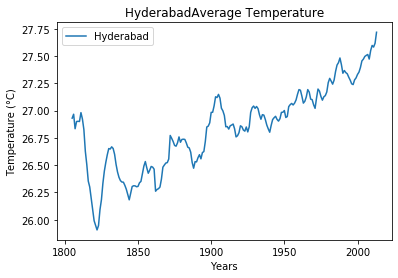

In [24]:
# Plot a line chart for Your city Temperature

plt.plot(filtered_city_df["year"],filtered_city_df["city_10yr_moving_avg"],label=your_city)

plt.legend()

plt.xlabel("Years")

plt.ylabel("Temperature (°C)")

plt.title(your_city+"Average Temperature")

plt.show()

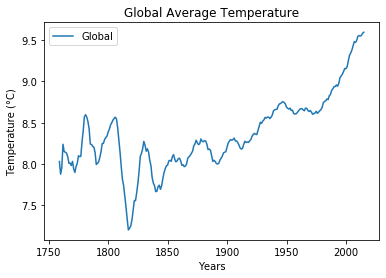

In [25]:
# Plot a line chart for Global Temperature

plt.plot(global_df["year"],global_df["global_10yr_moving_avg"],label="Global")

plt.legend()

plt.xlabel("Years")

plt.ylabel("Temperature (°C)") 

plt.title("Global Average Temperature")

plt.show()

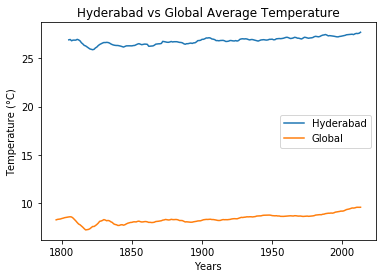

In [27]:
# Plot a comparison line chart: Your City vs Global Temperature

plt.plot(combined_dataset['year'], combined_dataset['city_10yr_moving_avg'], label=your_city)

plt.plot(combined_dataset['year'], combined_dataset['global_10yr_moving_avg'], label='Global')

plt.legend()

plt.xlabel("Years")

plt.ylabel("Temperature (°C)")

plt.title(f"{your_city} vs Global Average Temperature")

plt.show()

In [29]:
country_list = city_global_df['country'].unique()

city_list = city_global_df['city'].unique()

correlation_list = []

#print(country_list.shape)

#print(city_list.shape)

for country_index, your_country in np.ndenumerate(country_list):
    
    filtered_country_df = city_global_df[city_global_df['country'] == your_country].copy()
    
    #for city_index, your_city in np.ndenumerate(city_list):
    
    for city_index, your_city in np.ndenumerate(filtered_country_df['city'].unique()):
        
        filtered_city_df = filtered_country_df[filtered_country_df['city'] == your_city].copy()
        
        city_mean = filtered_city_df['city_avg_temp'].mean()
        
        filtered_city_df.fillna(city_mean,inplace=True)
        
        corr, _ = pearsonr(filtered_city_df["city_avg_temp"],filtered_city_df["global_avg_temp"])
        
        correlation_tuple = (your_country,your_city,corr)
        
        correlation_list.append(correlation_tuple)
    
print(*correlation_list,sep = "\n")

print(f"\nMaximum correlation is obtained for: {max(correlation_list,key=lambda item:item[2])}\n")
      
print(f"Minimum correlation is obtained for: {min(correlation_list,key=lambda item:item[2])}\n")

max_corr_country,max_corr_city,max_corr = max(correlation_list,key=lambda item:item[2])

min_corr_country,min_corr_city,min_corr = min(correlation_list,key=lambda item:item[2])



#=======================Separate Maximum correlation city====================================

filtered_maxcorr_country_df = city_global_df[city_global_df['country'] == max_corr_country].copy()

filtered_maxcorr_city_df = filtered_maxcorr_country_df[filtered_maxcorr_country_df['city'] == max_corr_city].copy()

city_mean = filtered_maxcorr_city_df['city_avg_temp'].mean()

filtered_maxcorr_city_df.fillna(city_mean,inplace=True)

filtered_maxcorr_city_df["city_10yr_moving_avg"] = filtered_maxcorr_city_df["city_avg_temp"].rolling(window=10).mean()

print(f"{filtered_maxcorr_city_df.head(15)}\n")



#=======================Separate Minimum correlation city====================================

filtered_mincorr_country_df = city_global_df[city_global_df['country'] == min_corr_country].copy()

filtered_mincorr_city_df = filtered_mincorr_country_df[filtered_mincorr_country_df['city'] == min_corr_city].copy()

city_mean = filtered_mincorr_city_df['city_avg_temp'].mean()

filtered_mincorr_city_df.fillna(city_mean,inplace=True)

filtered_mincorr_city_df["city_10yr_moving_avg"] = filtered_mincorr_city_df["city_avg_temp"].rolling(window=10).mean()

print(f"{filtered_mincorr_city_df.head(15)}\n")




#=======================Global Temperature====================================

filtered_maxcorr_city_df["global_10yr_moving_avg"] = filtered_maxcorr_city_df["global_avg_temp"].rolling(window=10).mean()

print(f"{filtered_maxcorr_city_df.head(15)}\n")
    

("Côte D'Ivoire", 'Abidjan', 0.788034398027346)
("Côte D'Ivoire", 'Yamoussoukro', 0.8414871211806118)
('United Arab Emirates', 'Abu Dhabi', 0.7636984650459822)
('Nigeria', 'Abuja', 0.7427273675839247)
('Nigeria', 'Ibadan', 0.7481931899719295)
('Nigeria', 'Kaduna', 0.7469172480686462)
('Nigeria', 'Kano', 0.731072960198786)
('Nigeria', 'Lagos', 0.7871214084388616)
('Nigeria', 'Maiduguri', 0.6895808392827367)
('Nigeria', 'Port Harcourt', 0.7959795800868604)
('Ghana', 'Accra', 0.7562277313183328)
('Turkey', 'Adana', 0.7186382952463916)
('Turkey', 'Ankara', 0.6731340493690464)
('Turkey', 'Bursa', 0.6787700789952573)
('Turkey', 'Istanbul', 0.7186322966726684)
('Turkey', 'Izmir', 0.7295233644791417)
('Australia', 'Adelaide', 0.6321429032167494)
('Australia', 'Brisbane', 0.7796493768997478)
('Australia', 'Canberra', 0.6837550046591468)
('Australia', 'Melbourne', 0.6268829076648549)
('Australia', 'Perth', 0.6083560190953246)
('Australia', 'Sydney', 0.7543434932198329)
('India', 'Agra', 0.426762

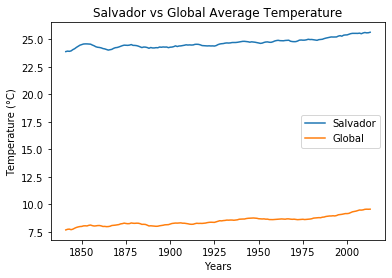

In [31]:
# Plot a comparison line chart: Maximum Correlation City vs Global Temperature

plt.plot(filtered_maxcorr_city_df['year'], filtered_maxcorr_city_df['city_10yr_moving_avg'], label=max_corr_city)

plt.plot(filtered_maxcorr_city_df['year'], filtered_maxcorr_city_df['global_10yr_moving_avg'], label='Global')

plt.legend()

plt.xlabel("Years")

plt.ylabel("Temperature (°C)")

plt.title(f"{max_corr_city} vs Global Average Temperature")

plt.show()

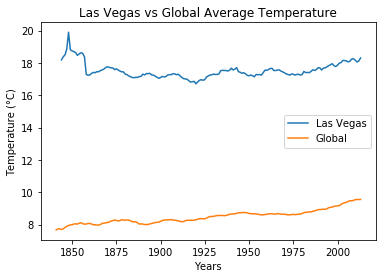

In [32]:
# Plot a comparison line chart: Minimum Correlation City vs Global Temperature

plt.plot(filtered_mincorr_city_df['year'], filtered_mincorr_city_df['city_10yr_moving_avg'], label=min_corr_city)

plt.plot(filtered_maxcorr_city_df['year'], filtered_maxcorr_city_df['global_10yr_moving_avg'], label='Global')

plt.legend()

plt.xlabel("Years")

plt.ylabel("Temperature (°C)")

plt.title(f"{min_corr_city} vs Global Average Temperature")

plt.show()